#Import data dari layanan cloud google, Gdrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Mengunduh Library

In [1]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk
!pip install Sastrawi


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#Import Library

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessor as p
import random
import nltk
import Sastrawi
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud, STOPWORDS
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
#Mendownload tokenizer data 'punkt' dari NLTK,
# Tokenizer 'punkt' digunakan untuk memisahkan teks menjadi token kata atau kalimat
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Memanggil Dataset

In [3]:
# Membaca file CSV dan mengonversinya menjadi sebuah DataFrame
dataset = pd.read_csv('translated_dataset.csv')

dataset.head() #Menampilkan lima baris pertama dari DataFrame

,created_at,full_text,full_text_english
0,Sat Mar 09 14:25:47 +0000 2024,@Nicho_Silalahi EMAK EMAK MEDAN PUNYA CERITA A...,@Nicho_silalahi Mother Medan Mother has a stor...
1,Sat Mar 09 13:11:58 +0000 2024,"Real .., Pemilu 2024 menjadi ajang adu curang....","Real .., the 2024 election is a cheating compe..."
2,Sat Mar 09 13:06:48 +0000 2024,@blank0429 @AirdanGelombang 2014-2019 Aman wal...,@blank0429 @airdangelambangt 2014-2019 safe ev...
3,Sat Mar 09 12:29:01 +0000 2024,Semoga lancar #HakAngketHakRakyat #DukungHakAn...,I hope it will run smoothly
4,Sat Mar 09 12:21:48 +0000 2024,@PDI_Perjuangan 02 mestinya senang ada hak ang...,@Pdi_perjuangan 02 it should be happy that the...


In [4]:
dataset.shape

(1857, 3)

#Transformasi Data

##Merubah tipe data pada kolom created_at menjadi date

In [5]:
# Mengubah tipe data kolom 'created_at' menjadi datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])

# Hapus informasi zona waktu dengan fungsi strftime
dataset['created_at'] = dataset['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

C:\Users\test\AppData\Local\Temp\ipykernel_24476\3686215072.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['created_at'] = pd.to_datetime(dataset['created_at'])


In [6]:
# Mengubah tipe data kolom 'created_at' menjadi datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])

In [7]:
# Mengurutkan data berdasarkan data dimulai dan Menampilkan data dari DataFrame
dataset.sort_values(by='created_at', inplace=True)
dataset

,created_at,full_text,full_text_english
921,2024-02-19 13:51:18,"Saksikan iNews Prime Dinilai Curang, Pemilu Di...","Watch iNews Prime is considered cheating, the ..."
920,2024-02-19 13:57:59,@BANGSAygSUJUD @4Y4NKZ @kurawa @cuitcuap_ @pra...,@Bangsaygsadis @4y4nkz @kurawa @cuitcuap_ @pra...
919,2024-02-19 14:03:03,??....Profesor Dr Mahfud MD Menyebutkan Pemilu...,?? .... Professor Dr. Mahfud MD said that the ...
918,2024-02-19 14:08:27,"Profesor nih guys???? Fakta harus diungkap, ke...","Professor guys ????Facts must be revealed, the..."
917,2024-02-19 14:09:55,joggetin aja aahhhh???? all in sini pada mampi...,just jogging aahhhh ????All in here to stop by...
...,...,...,...
1025,2024-06-05 10:18:16,@OposisiCerdas Skrg pihak tertentu katakan bhw...,@OposiCerdas now certain parties say that the ...
1024,2024-06-06 12:41:27,Sama aja DPR berkata : Jangan lagi sebut ada k...,The same DPR said: Don't mention there is a 20...
1023,2024-06-07 03:46:20,Cara pemerintah tercepat untuh menghasilkan ua...,The fastest way to make money to make money is...
1022,2024-06-07 07:25:12,@ReefReese Mari kita dukung KPU dan Bawaslu da...,@ReefReese Mari kita dukung KPU dan Bawaslu da...


In [8]:
#Jumlah data, Jumlah kolom
dataset.shape

(1857, 3)

In [9]:
# Calculate the duration in days
start_date = dataset['created_at'].min()
end_date = dataset['created_at'].max()
duration_days = (end_date - start_date).days

# Print results
print("Tanggal awal: ", start_date)
print("Tanggal akhir: ", end_date)
print(f"Durasi: {duration_days} Hari.")

Tanggal awal:  2024-02-19 13:51:18
Tanggal akhir:  2024-06-07 13:36:47
Durasi: 108 Hari.


In [10]:
# Memberikan informasi ringkas tentang dataset, termasuk jumlah baris dan kolom,
# serta tipe data dan jumlah nilai non-null untuk setiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1857 entries, 921 to 1021
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   created_at         1857 non-null   datetime64[ns]
 1   full_text          1857 non-null   object        
 2   full_text_english  1857 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 58.0+ KB


In [11]:
# Memberikan informasi untuk mengetahui nama-nama kolom yang ada dalam dataset
dataset.columns

Index(['created_at', 'full_text', 'full_text_english'], dtype='object')

In [12]:
dataset.describe()

,created_at
count,1857
mean,2024-04-02 02:33:55.295099392
min,2024-02-19 13:51:18
25%,2024-02-26 09:40:45
50%,2024-04-03 18:04:36
75%,2024-05-09 10:45:00
max,2024-06-07 13:36:47


In [13]:
dataset.dtypes # Memeriksa tipe data yang dimiliki oleh setiap kolom

created_at           datetime64[ns]
full_text                    object
full_text_english            object
dtype: object

#Cleansing

In [14]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Menghapus mention
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtag
    text = re.sub(r'RT[\s]+', '', text)  # Menghapus retweet indicator
    text = re.sub(r'https?://\S+', '', text)  # Menghapus hyperlinks

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Menghapus karakter selain huruf dan angka
    text = re.sub(r'\s+', ' ', text).strip()  # Mengganti multiple spaces menjadi single space
    return text

# Mengaplikasikan fungsi clean_twitter_text pada kolom 'full_text' dan full_text_english dalam DataFrame dataset
dataset['full_text'] = dataset['full_text'].apply(clean_twitter_text)
dataset['full_text_english'] = dataset['full_text_english'].apply(clean_twitter_text)
dataset


,created_at,full_text,full_text_english
921,2024-02-19 13:51:18,Saksikan iNews Prime Dinilai Curang Pemilu Dim...,Watch iNews Prime is considered cheating the e...
920,2024-02-19 13:57:59,Lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videoIs...
919,2024-02-19 14:03:03,Profesor Dr Mahfud MD Menyebutkan Pemilu 2024 ...,Professor Dr Mahfud MD said that the 2024 elec...
918,2024-02-19 14:08:27,Profesor nih guys Fakta harus diungkap kebenar...,Professor guys Facts must be revealed the trut...
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh All in here to stop by you...
...,...,...,...
1025,2024-06-05 10:18:16,Skrg pihak tertentu katakan bhw kecurangan pem...,now certain parties say that the 2024 election...
1024,2024-06-06 12:41:27,Sama aja DPR berkata Jangan lagi sebut ada kec...,The same DPR said Dont mention there is a 2024...
1023,2024-06-07 03:46:20,Cara pemerintah tercepat untuh menghasilkan ua...,The fastest way to make money to make money is...
1022,2024-06-07 07:25:12,Mari kita dukung KPU dan Bawaslu dalam upaya m...,Mari kita dukung KPU dan Bawaslu dalam upaya m...


In [15]:
# Periksa duplikat berdasarkan kolom 'created_at', 'full_text', dan 'full_text_english'
duplicates = dataset.duplicated(subset=['created_at', 'full_text', 'full_text_english'])

# Hitung jumlah data yang duplikat
num_duplicates = duplicates.sum()

print('Jumlah data duplikat:', num_duplicates)


Jumlah data duplikat: 47


In [16]:
# Hapus duplikat berdasarkan kolom 'created_at', 'full_text', dan 'full_text_english'
dataset.drop_duplicates(subset=['created_at', 'full_text', 'full_text_english'], inplace=True)

# Cetak informasi tentang dataset setelah penghapusan duplikat
print('Jumlah data setelah menghapus duplikat:', len(dataset))


Jumlah data setelah menghapus duplikat: 1810


In [17]:
# Memeriksa jumlah data yang duplikat/memiliki kesamaan
dataset.duplicated().sum()

0

In [18]:
# Memeriksa jumlah data yang bernilai kosong
dataset.isnull().sum()

created_at           0
full_text            0
full_text_english    0
dtype: int64

In [19]:
# Menghapus data kosong
dataset.dropna(inplace=True)

In [20]:
# Memeriksa jumlah data yang bernilai kosong
dataset.isnull().sum()

created_at           0
full_text            0
full_text_english    0
dtype: int64

In [21]:
#Jumlah data, Jumlah kolom
dataset.shape

(1810, 3)

#Case Folding

In [22]:
# Mengubah semua teks dalam kolom 'full_text' dan full_text_english menjadi huruf kecil (lowercase) menggunakan metode str.lower()
dataset['full_text'] = dataset['full_text'].str.lower()
dataset['full_text_english'] = dataset['full_text_english'].str.lower()
dataset # Menampilkan data dari DataFrame


,created_at,full_text,full_text_english
921,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...
920,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...
919,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...
918,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...
...,...,...,...
1025,2024-06-05 10:18:16,skrg pihak tertentu katakan bhw kecurangan pem...,now certain parties say that the 2024 election...
1024,2024-06-06 12:41:27,sama aja dpr berkata jangan lagi sebut ada kec...,the same dpr said dont mention there is a 2024...
1023,2024-06-07 03:46:20,cara pemerintah tercepat untuh menghasilkan ua...,the fastest way to make money to make money is...
1022,2024-06-07 07:25:12,mari kita dukung kpu dan bawaslu dalam upaya m...,mari kita dukung kpu dan bawaslu dalam upaya m...


#Labelling Indo

In [23]:
pos = pd.read_csv('positif.csv')
neg = pd.read_csv('negatif.csv')

# Assuming pos and neg are pandas DataFrames with 'word' and 'weight' columns
lexicon_positive = {row['word']: row['weight'] for index, row in pos.iterrows()}
lexicon_negative = {row['word']: row['weight'] for index, row in neg.iterrows()}

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    # Normalize the text (e.g., to lowercase)
    words = text.lower().split()
    score = 0
    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]  # Use -= for negative weights

    if score > 0:
        polarity = 'Positif'
    elif score < 0:
        polarity = 'Negatif'
    else:
        polarity = 'Netral'

    return score, polarity

In [ ]:
# Results from determine sentiment polarity of tweets

results = dataset['full_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dataset['polarity_score'] = results[0]
dataset['klasifikasi'] = results[1]
print(dataset['klasifikasi'].value_counts())
print("\n")
dataset

#Labelling TextBlob

In [24]:
from textblob import TextBlob

# Menambahkan kolom polaritas menggunakan TextBlob
dataset["Positif"] = [TextBlob(str(i)).sentiment.polarity if TextBlob(str(i)).sentiment.polarity > 0 else 0 for i in dataset["full_text_english"]]
dataset["Negatif"] = [abs(TextBlob(str(i)).sentiment.polarity) if TextBlob(str(i)).sentiment.polarity < 0 else 0 for i in dataset["full_text_english"]]
dataset["Netral"] = [1 - abs(TextBlob(str(i)).sentiment.polarity) for i in dataset["full_text_english"]]
dataset['Compound'] = [TextBlob(str(i)).sentiment.polarity for i in dataset["full_text_english"]]

# Menentukan sentimen berdasarkan polaritas
sentiment = []
for i in dataset["Compound"]:
    if i > 0.0:
        sentiment.append('Positif')
    elif i < 0.0:
        sentiment.append('Negatif')
    else:
        sentiment.append('Netral')
dataset["klasifikasi"] = sentiment

# Menampilkan DataFrame dengan kolom baru di samping kolom yang sudah ada
dataset.head()

,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi
921,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.0,0.00,1.00,0.00,Netral
920,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.0,0.00,1.00,0.00,Netral
919,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.0,0.05,0.95,-0.05,Negatif
918,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.0,0.00,1.00,0.00,Netral
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.0,0.00,1.00,0.00,Netral


#Informasi Setelah dilakukan Proses Labelling

In [25]:
# Menghitung jumlah sentimen
sentiment_counts = dataset['klasifikasi'].value_counts()

# Display the counts
print("Jumlah Sentimen Positif:", sentiment_counts.get('Positif', 0))
print("Jumlah Sentimen Negatif:", sentiment_counts.get('Negatif', 0))
print("Jumlah Sentimen Netral:", sentiment_counts.get('Netral', 0))
print("Total Keseluruhan Sentimen:", len(dataset))

Jumlah Sentimen Positif: 821
Jumlah Sentimen Negatif: 422
Jumlah Sentimen Netral: 567
Total Keseluruhan Sentimen: 1810


In [26]:
# Menghitung jumlah sentimen
sentiment_counts = dataset['klasifikasi'].value_counts()

# Mendapatkan jumlah masing-masing sentimen
jumlah_positif = sentiment_counts.get('Positif', 0)
jumlah_negatif = sentiment_counts.get('Negatif', 0)
jumlah_netral = sentiment_counts.get('Netral', 0)

# Total keseluruhan sentimen
total_sentimen = len(dataset)

# Menghitung persentase masing-masing sentimen
persentase_positif = (jumlah_positif / total_sentimen) * 100
persentase_negatif = (jumlah_negatif / total_sentimen) * 100
persentase_netral = (jumlah_netral / total_sentimen) * 100

# Menghitung selisih persentase antara sentimen
selisih_positif_negatif = abs(persentase_positif - persentase_negatif)
selisih_positif_netral = abs(persentase_positif - persentase_netral)
selisih_negatif_netral = abs(persentase_negatif - persentase_netral)

# Menampilkan hasil
print("Persentase Sentimen Positif:", f"{persentase_positif:.2f}%")
print("Persentase Sentimen Negatif:", f"{persentase_negatif:.2f}%")
print("Persentase Sentimen Netral:", f"{persentase_netral:.2f}%")
print("Total Keseluruhan Sentimen:", total_sentimen)

print("Selisih Persentase Sentimen Positif dan Negatif:", f"{selisih_positif_negatif:.2f}%")
print("Selisih Persentase Sentimen Positif dan Netral:", f"{selisih_positif_netral:.2f}%")
print("Selisih Persentase Sentimen Negatif dan Netral:", f"{selisih_negatif_netral:.2f}%")


Persentase Sentimen Positif: 45.36%
Persentase Sentimen Negatif: 23.31%
Persentase Sentimen Netral: 31.33%
Total Keseluruhan Sentimen: 1810
Selisih Persentase Sentimen Positif dan Negatif: 22.04%
Selisih Persentase Sentimen Positif dan Netral: 14.03%
Selisih Persentase Sentimen Negatif dan Netral: 8.01%


#Preprocesing

##Normalisasi Dengan Kamus

In [27]:
# Membaca file CSV dan mengonversinya menjadi sebuah DataFrame
norm = pd.read_csv('key_norm.csv')
norm.head() #Menampilkan lima baris pertama dari DataFrame

,singkat,hasil
0,abis,habis
1,accent,tekanan
2,accept,terima
3,accident,kecelakaan
4,achievement,prestasi


In [28]:
norm_w = norm.fillna('')
norm_w

,singkat,hasil
0,abis,habis
1,accent,tekanan
2,accept,terima
3,accident,kecelakaan
4,achievement,prestasi
...,...,...
3726,pilpres,pemilihan presiden
3727,parpol,partai politik
3728,pragib,prabowo gibran
3729,calon,calon legitlatif


In [29]:
dataset['norm'] = dataset['full_text'].apply(lambda x: nltk.word_tokenize(x))
normalized_word_dict = {}
for index, row in norm_w.iterrows():
    normalized_word_dict[row['singkat']] = row['hasil']


# Fungsi untuk normalisasi token
def normalized_term(document):
    return [str(normalized_word_dict.get(term, term)) for term in document]


dataset['norm'] = dataset['norm'].apply(normalized_term).apply(lambda tokens: ' '.join(tokens))
dataset

,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi,norm
921,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.000000,0.000000,1.000000,0.000000,Netral,saksikan inews prime dinilai curang pemilu dim...
920,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.000000,0.000000,1.000000,0.000000,Netral,lalu berdasarkan video ini bisa dibuat kesimpu...
919,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.000000,0.050000,0.950000,-0.050000,Negatif,profesor dari mahfud md menyebutkan pemilu 202...
918,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.000000,0.000000,1.000000,0.000000,Netral,profesor nih guys fakta harus diungkap kebenar...
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.000000,0.000000,1.000000,0.000000,Netral,joggetin saja aahhhh all in sini pada mampir k...
...,...,...,...,...,...,...,...,...,...
1025,2024-06-05 10:18:16,skrg pihak tertentu katakan bhw kecurangan pem...,now certain parties say that the 2024 election...,0.103571,0.000000,0.896429,0.103571,Positif,sekarang pihak tertentu katakan bhw curang pem...
1024,2024-06-06 12:41:27,sama aja dpr berkata jangan lagi sebut ada kec...,the same dpr said dont mention there is a 2024...,0.000000,0.000000,1.000000,0.000000,Netral,sama saja dpr berkata jangan lagi sebut ada cu...
1023,2024-06-07 03:46:20,cara pemerintah tercepat untuh menghasilkan ua...,the fastest way to make money to make money is...,0.200000,0.000000,0.800000,0.200000,Positif,cara pemerintah tercepat untuh menghasilkan ua...
1022,2024-06-07 07:25:12,mari kita dukung kpu dan bawaslu dalam upaya m...,mari kita dukung kpu dan bawaslu dalam upaya m...,0.000000,0.000000,1.000000,0.000000,Netral,mari kita dukung kpu dan bawaslu dalam upaya m...


##Normalisasi Dengan List Kata Custom

In [ ]:
#JANGAN DI RUNING
norm = {
    "yg": "yang", "pembantu": "membantu", "gilput": "golput", "tp": "tapi",
    "membiarkan": "biar", "tsb": "tersebut", "sbg": "sebagai", "semenjaka": "semenjak",
    "wkil": "wakil", "rkyat": "rakyat", "Disqualifikasi": "kualifikasi",
    "lbh": "lebih", "laknatlah": "laknat", "org2": "orang", "sengsara": "kesulitan",
    "orang2": "orang-orang", "teriak2": "teriak", "th": "tahun",
    "modar": "mati", "utk": "untuk", "tak": "tidak", "sy": "saya",
    "dmn": "dimana", "jurdil": "jujur adil", "org": "orang",
    "dn": "dan", "ia": "iya", "amp": "sampai", "awasi": "awas",
    "ogah": "tidak bersedia", "sblm": "sebelum", "tdk": "tidak",
    "fix": "setuju", "jd": "jadi", "&": "dan", "slm": "selama",
    "lu": "kamu", "Rc": "real account", "krn": "karena",
    "dlm": "dalam", "sj": "saja", "dng": "dengan",
    "hrs": "harus", "dpt": "dapat", "smg": "semoga",
    "jng": "jangan", "ngga": "tidak", "ga": "tidak",
    "trs": "terus", "kpn": "kapan", "sdh": "sudah",
    "thn": "tahun", "tlh": "telah", "jk": "jika",
    "msh": "masih", "gk": "engga", "mngkn": "mungkin",
    "blm": "belum", "gini": "begini", "emak-emak": "ibu",
    "bangsat": "jahat", "biar": "supaya", "amburadul": "berantakan",
    "Chaos": "kacau", "tersosialisasikan": "sosialisasi", "terlaksananya": "laksana",
    "kehancuran": "hancur", "demikrasi": "demokrasi", "Beneran": "benar",
    "protes": "menentang", "dicurigai": "curiga", "Siapayang": "siapa",
    "merajalelanya": "sewenang-wenang", "sndiri": "sendiri", "Bskah": "bisa",
    "Brrti": "berarti", "Parpol": "partai politik", "argumenmu,argumen": "alasan",
    "menjegal": "menjatuhkan", "dicblos,dicoblos": "coblos", "bergulirnya": "gulir",
    "memenangkan": "menang", "ttg": "tentang", "jls": "jelas",
    "diajukan": "maju", "amburadul": "berantakan", "riuh": "ramai",
    "prtama": "pertama", "laknatlah": "kutuk", "tumpah ruah": "tumpah",
    "perpecahan": "keadaan", "ngeles": "menghindar", "timsus": "tim sukses"
}



def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

dataset['norm'] = dataset['full_text'].apply(normalisasi)


##Tokenizing

In [30]:
dataset['tokens'] = dataset['norm'].apply(lambda x: nltk.word_tokenize(x))
dataset

,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi,norm,tokens
921,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.000000,0.000000,1.000000,0.000000,Netral,saksikan inews prime dinilai curang pemilu dim...,"[saksikan, inews, prime, dinilai, curang, pemi..."
920,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.000000,0.000000,1.000000,0.000000,Netral,lalu berdasarkan video ini bisa dibuat kesimpu...,"[lalu, berdasarkan, video, ini, bisa, dibuat, ..."
919,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.000000,0.050000,0.950000,-0.050000,Negatif,profesor dari mahfud md menyebutkan pemilu 202...,"[profesor, dari, mahfud, md, menyebutkan, pemi..."
918,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.000000,0.000000,1.000000,0.000000,Netral,profesor nih guys fakta harus diungkap kebenar...,"[profesor, nih, guys, fakta, harus, diungkap, ..."
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.000000,0.000000,1.000000,0.000000,Netral,joggetin saja aahhhh all in sini pada mampir k...,"[joggetin, saja, aahhhh, all, in, sini, pada, ..."
...,...,...,...,...,...,...,...,...,...,...
1025,2024-06-05 10:18:16,skrg pihak tertentu katakan bhw kecurangan pem...,now certain parties say that the 2024 election...,0.103571,0.000000,0.896429,0.103571,Positif,sekarang pihak tertentu katakan bhw curang pem...,"[sekarang, pihak, tertentu, katakan, bhw, cura..."
1024,2024-06-06 12:41:27,sama aja dpr berkata jangan lagi sebut ada kec...,the same dpr said dont mention there is a 2024...,0.000000,0.000000,1.000000,0.000000,Netral,sama saja dpr berkata jangan lagi sebut ada cu...,"[sama, saja, dpr, berkata, jangan, lagi, sebut..."
1023,2024-06-07 03:46:20,cara pemerintah tercepat untuh menghasilkan ua...,the fastest way to make money to make money is...,0.200000,0.000000,0.800000,0.200000,Positif,cara pemerintah tercepat untuh menghasilkan ua...,"[cara, pemerintah, tercepat, untuh, menghasilk..."
1022,2024-06-07 07:25:12,mari kita dukung kpu dan bawaslu dalam upaya m...,mari kita dukung kpu dan bawaslu dalam upaya m...,0.000000,0.000000,1.000000,0.000000,Netral,mari kita dukung kpu dan bawaslu dalam upaya m...,"[mari, kita, dukung, kpu, dan, bawaslu, dalam,..."


##Stopword Removal

In [31]:
from nltk.corpus import stopwords

more_stop_words = ['agak', 'aku', 'akupun', 'amin', 'ampun', 'anda', 'arghh', 'ataupun','dah', 'di','utak', 'atik','bin','yaa','ini','masa','iya','Wooii',
                   'awkowkwkwkwk', 'a', 'aduh', 'aaaa','g','bolol','otak','jilat','spy','anjing','penjajah','cuap','nyungsep','salam','pecundang','ciut',
                   'b', 'bung','harus','segera','hukum','mati','aq','oso','truss','ckck','pra','dilema','tsm','mrpk','Kok', 'tau','minus','malu','viral',
                   'dah', 'deh', 'dia', 'dong', 'dooooong', 'diihh', 'duh','Wwoooiii','belimbing', 'sayur', 'busuuk',' RCTI','gengnya','k','enggan','mulut',
                   'eh','Gempa', 'Kerasa', 'Besok', 'Senin', 'MBTI', 'Topan', 'Nessie', 'Abel', 'AirPods', 'Pro', 'Cowo', '2','itukah','lah','gadang','tobat'
                   'hehh', 'huehehe', 'hahahhaha', 'huhu', 'hahaha', 'hehe', 'hah', 'haha','Bismillah', 'Bangkai', 'Tikus', 'di','lemparkan','ajal','sj','segel',
                   'ke','Telor', 'Busuk', 'pun', 'tidak', 'luput','Lempar', 'ke', 'kantor','ngaku','ga' ,'pantas','Brrti','bengis','kotor','hina','mmgnya','ad','kl',
                   'iih', 'inikan', 'itukan', 'iya', 'ilah', 'iyaa','ngeriii','terimakasih','ini','ersama2','ndhasmu','bobrok','endors','culaasss','ndak','kan','cs',
                   'jub', 'juga', 'jiah','kah', 'kalau', 'kalian', 'kamu', 'kamunya', 'kan', 'kok', 'ku', 'kali','keji','kubu','dengan','bro','pd','seruan','ib','hrs',
                   'kwkwkw', 'kalaupun','lah', 'lho','mah', 'misal', 'mon','nah', 'nih', 'noh', 'nya','ni','prlu','hdir','crang','n','yatakn','mukidi','vs','meng','bs',
                   'mantap','jan','jos','tenan','gimana','cocok','kamu', 'rasa','kotor','teriak','mati','bismillah','joggetin','aja','aahhhh','all','in','oknum','pun',
                   'oh','pun', 'pun','bolol','jilat','pantat','kambing','otak','tsb','brengos','saya', 'setahu', 'si', 'sih', 'sihh','loe','hei','gpp','nya','Huuuu','Uuu',
                   'Uuuu','sorakin','Habib','Bahar','Keris','dan','Rencong','aq','catet','sekloter','keblinger','ngerosting','kucing',' yg', 'mengigit','buntutnya','sendiri',
                   'toh', 'tuh','wah','wkk', 'wkkk', 'wkwk', 'wkwkw', 'wkwkwk', 'wkwkwkw',' Ayoo','mosi','Pekaes','bete', 'yah', 'ama','Setuju','sekali','suul khotimah','bajingan',
                   ' tengik','ibarat', 'bunyi', 'kentut','tidak', 'terlihat', 'mata', 'namun', 'bau','busuknya','menyebar','tembusan','kok', 'lalu', 'kau', 'kaitkan', 'move on',
                    'wkwkwkwk',' woi','statement','dong','di','rakernas','v','menyoroti','mudah','saja','dasar','tak','tahu','malu','sekotor','segudang ','takut','penjara',
                    'bunuh','diri','massif','dkk','alat','vitalnya','ia','picu','maklum','Plonga','mengawinkan','mobilisasi','neraka', 'jahannam','nih','guys','anti',
                    'woi','pinokio','si','plonga','plongo','mpa','gempar','gantung','mati','oknum','fiks','hayo','donk','brrrrrrrreaking',
                   'wkwkwkwkwkwkwkwkwk', 'wkwm', 'wow', 'waduh', 'weh', 'wehh', 'woy','cs','wah','omon','mbah', 'wo','buah','7olol','versi',' yurisprudensinya',
                   'x','yaila', 'yup', 'yah', 'ya', 'yuyur', 'yup', 'yhahaha', 'yang', 'dan','di', 'tidak', 'ini', 'ada',]

#Menggabungkan antara daftar stop words dalam bahasa Indonesia dalam library nltk
#dengan daftar stop words tambahan yang sebelumnya telah didefinisikan
stopwords_ind = stopwords.words('indonesian') + more_stop_words

#Fungsi untuk menerima teks sebagai input, membaginya menjadi kata-kata, dan kemudian memeriksa setiap kata
#Jika kata tersebut tidak termasuk dalam daftar stop words (baik dari NLTK maupun daftar tambahan),
#kata tersebut akan dimasukkan ke dalam daftar clean_words
#Hasilnya adalah teks yang telah dibersihkan dari stop words
def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return"".join(clean_words)

#Memeriksa setiap token dalam daftar kata-kata, dan hanya menyimpan token tersebut jika tidak termasuk dalam daftar stop words
#lalu menerapkannya ke setiap elemen dalam kolom 'tokens' dalam dataset
#kemudian disimpan dalam kolom 'stopword' dalam dataset
dataset['stopword'] = dataset['tokens'].apply(lambda x: [item for item in x if item not in stopwords_ind])

dataset #Menampilkan data dari DataFrame


,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi,norm,tokens,stopword
921,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.000000,0.000000,1.000000,0.000000,Netral,saksikan inews prime dinilai curang pemilu dim...,"[saksikan, inews, prime, dinilai, curang, pemi...","[saksikan, inews, prime, dinilai, curang, pemi..."
920,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.000000,0.000000,1.000000,0.000000,Netral,lalu berdasarkan video ini bisa dibuat kesimpu...,"[lalu, berdasarkan, video, ini, bisa, dibuat, ...","[berdasarkan, video, kesimpulan, pemilu, curan..."
919,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.000000,0.050000,0.950000,-0.050000,Negatif,profesor dari mahfud md menyebutkan pemilu 202...,"[profesor, dari, mahfud, md, menyebutkan, pemi...","[profesor, mahfud, md, pemilu, 2024, berpeluan..."
918,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.000000,0.000000,1.000000,0.000000,Netral,profesor nih guys fakta harus diungkap kebenar...,"[profesor, nih, guys, fakta, harus, diungkap, ...","[profesor, fakta, diungkap, kebenaran, ditegak..."
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.000000,0.000000,1.000000,0.000000,Netral,joggetin saja aahhhh all in sini pada mampir k...,"[joggetin, saja, aahhhh, all, in, sini, pada, ...","[mampir, 2024]"
...,...,...,...,...,...,...,...,...,...,...,...
1025,2024-06-05 10:18:16,skrg pihak tertentu katakan bhw kecurangan pem...,now certain parties say that the 2024 election...,0.103571,0.000000,0.896429,0.103571,Positif,sekarang pihak tertentu katakan bhw curang pem...,"[sekarang, pihak, tertentu, katakan, bhw, cura...","[bhw, curang, pemilu, 2024, berita, hoax, alas..."
1024,2024-06-06 12:41:27,sama aja dpr berkata jangan lagi sebut ada kec...,the same dpr said dont mention there is a 2024...,0.000000,0.000000,1.000000,0.000000,Netral,sama saja dpr berkata jangan lagi sebut ada cu...,"[sama, saja, dpr, berkata, jangan, lagi, sebut...","[dpr, curang, pemilu, 2024]"
1023,2024-06-07 03:46:20,cara pemerintah tercepat untuh menghasilkan ua...,the fastest way to make money to make money is...,0.200000,0.000000,0.800000,0.200000,Positif,cara pemerintah tercepat untuh menghasilkan ua...,"[cara, pemerintah, tercepat, untuh, menghasilk...","[pemerintah, tercepat, untuh, menghasilkan, ua..."
1022,2024-06-07 07:25:12,mari kita dukung kpu dan bawaslu dalam upaya m...,mari kita dukung kpu dan bawaslu dalam upaya m...,0.000000,0.000000,1.000000,0.000000,Netral,mari kita dukung kpu dan bawaslu dalam upaya m...,"[mari, kita, dukung, kpu, dan, bawaslu, dalam,...","[mari, dukung, kpu, bawaslu, upaya, mewujudkan..."


##Stemming

In [32]:
# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan proses mengubah kata-kata menjadi bentuk dasar atau akar kata pada setiap kata dalam teks
def stemming(words):
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

# Menerapkan fungsi 'stemming' ke setiap elemen dalam kolom 'stopword' dalam dataset menggunakan metode apply,
# dan hasilnya disimpan dalam kolom baru bernama 'stemming'
dataset['stemming'] = dataset['stopword'].apply(stemming)

# Menampilkan data dari DataFrame
dataset

,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi,norm,tokens,stopword,stemming
921,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.000000,0.000000,1.000000,0.000000,Netral,saksikan inews prime dinilai curang pemilu dim...,"[saksikan, inews, prime, dinilai, curang, pemi...","[saksikan, inews, prime, dinilai, curang, pemi...","[saksi, inews, prime, nilai, curang, milu, ula..."
920,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.000000,0.000000,1.000000,0.000000,Netral,lalu berdasarkan video ini bisa dibuat kesimpu...,"[lalu, berdasarkan, video, ini, bisa, dibuat, ...","[berdasarkan, video, kesimpulan, pemilu, curan...","[dasar, video, simpul, milu, curang, orang, am..."
919,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.000000,0.050000,0.950000,-0.050000,Negatif,profesor dari mahfud md menyebutkan pemilu 202...,"[profesor, dari, mahfud, md, menyebutkan, pemi...","[profesor, mahfud, md, pemilu, 2024, berpeluan...","[profesor, mahfud, md, milu, 2024, peluang, ul..."
918,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.000000,0.000000,1.000000,0.000000,Netral,profesor nih guys fakta harus diungkap kebenar...,"[profesor, nih, guys, fakta, harus, diungkap, ...","[profesor, fakta, diungkap, kebenaran, ditegak...","[profesor, fakta, ungkap, benar, tegak, profes..."
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.000000,0.000000,1.000000,0.000000,Netral,joggetin saja aahhhh all in sini pada mampir k...,"[joggetin, saja, aahhhh, all, in, sini, pada, ...","[mampir, 2024]","[mampir, 2024]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2024-06-05 10:18:16,skrg pihak tertentu katakan bhw kecurangan pem...,now certain parties say that the 2024 election...,0.103571,0.000000,0.896429,0.103571,Positif,sekarang pihak tertentu katakan bhw curang pem...,"[sekarang, pihak, tertentu, katakan, bhw, cura...","[bhw, curang, pemilu, 2024, berita, hoax, alas...","[bhw, curang, milu, 2024, berita, hoax, alas, ..."
1024,2024-06-06 12:41:27,sama aja dpr berkata jangan lagi sebut ada kec...,the same dpr said dont mention there is a 2024...,0.000000,0.000000,1.000000,0.000000,Netral,sama saja dpr berkata jangan lagi sebut ada cu...,"[sama, saja, dpr, berkata, jangan, lagi, sebut...","[dpr, curang, pemilu, 2024]","[dpr, curang, milu, 2024]"
1023,2024-06-07 03:46:20,cara pemerintah tercepat untuh menghasilkan ua...,the fastest way to make money to make money is...,0.200000,0.000000,0.800000,0.200000,Positif,cara pemerintah tercepat untuh menghasilkan ua...,"[cara, pemerintah, tercepat, untuh, menghasilk...","[pemerintah, tercepat, untuh, menghasilkan, ua...","[perintah, cepat, untuh, hasil, uang, malakin,..."
1022,2024-06-07 07:25:12,mari kita dukung kpu dan bawaslu dalam upaya m...,mari kita dukung kpu dan bawaslu dalam upaya m...,0.000000,0.000000,1.000000,0.000000,Netral,mari kita dukung kpu dan bawaslu dalam upaya m...,"[mari, kita, dukung, kpu, dan, bawaslu, dalam,...","[mari, dukung, kpu, bawaslu, upaya, mewujudkan...","[mari, dukung, kpu, bawaslu, upaya, wujud, mil..."


In [33]:
# Ubah setiap list token dalam kolom 'stemming' menjadi sebuah string
dataset['stemming_string'] = dataset['stemming'].apply(lambda tokens: ' '.join(tokens))

kata = {" milu ":" pemilu "}
def fix_word(str_text):
  for i in kata:
    str_text = str_text.replace(i, kata[i])
  return str_text

dataset['stemming_string'] = dataset['stemming_string'].apply(lambda x: fix_word(x))
dataset #Menampilkan data dari DataFrame

,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi,norm,tokens,stopword,stemming,stemming_string
921,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.000000,0.000000,1.000000,0.000000,Netral,saksikan inews prime dinilai curang pemilu dim...,"[saksikan, inews, prime, dinilai, curang, pemi...","[saksikan, inews, prime, dinilai, curang, pemi...","[saksi, inews, prime, nilai, curang, milu, ula...",saksi inews prime nilai curang pemilu ulang se...
920,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.000000,0.000000,1.000000,0.000000,Netral,lalu berdasarkan video ini bisa dibuat kesimpu...,"[lalu, berdasarkan, video, ini, bisa, dibuat, ...","[berdasarkan, video, kesimpulan, pemilu, curan...","[dasar, video, simpul, milu, curang, orang, am...",dasar video simpul pemilu curang orang ambil s...
919,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.000000,0.050000,0.950000,-0.050000,Negatif,profesor dari mahfud md menyebutkan pemilu 202...,"[profesor, dari, mahfud, md, menyebutkan, pemi...","[profesor, mahfud, md, pemilu, 2024, berpeluan...","[profesor, mahfud, md, milu, 2024, peluang, ul...",profesor mahfud md pemilu 2024 peluang ulang m...
918,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.000000,0.000000,1.000000,0.000000,Netral,profesor nih guys fakta harus diungkap kebenar...,"[profesor, nih, guys, fakta, harus, diungkap, ...","[profesor, fakta, diungkap, kebenaran, ditegak...","[profesor, fakta, ungkap, benar, tegak, profes...",profesor fakta ungkap benar tegak profesor mah...
917,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.000000,0.000000,1.000000,0.000000,Netral,joggetin saja aahhhh all in sini pada mampir k...,"[joggetin, saja, aahhhh, all, in, sini, pada, ...","[mampir, 2024]","[mampir, 2024]",mampir 2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2024-06-05 10:18:16,skrg pihak tertentu katakan bhw kecurangan pem...,now certain parties say that the 2024 election...,0.103571,0.000000,0.896429,0.103571,Positif,sekarang pihak tertentu katakan bhw curang pem...,"[sekarang, pihak, tertentu, katakan, bhw, cura...","[bhw, curang, pemilu, 2024, berita, hoax, alas...","[bhw, curang, milu, 2024, berita, hoax, alas, ...",bhw curang pemilu 2024 berita hoax alas hoax t...
1024,2024-06-06 12:41:27,sama aja dpr berkata jangan lagi sebut ada kec...,the same dpr said dont mention there is a 2024...,0.000000,0.000000,1.000000,0.000000,Netral,sama saja dpr berkata jangan lagi sebut ada cu...,"[sama, saja, dpr, berkata, jangan, lagi, sebut...","[dpr, curang, pemilu, 2024]","[dpr, curang, milu, 2024]",dpr curang pemilu 2024
1023,2024-06-07 03:46:20,cara pemerintah tercepat untuh menghasilkan ua...,the fastest way to make money to make money is...,0.200000,0.000000,0.800000,0.200000,Positif,cara pemerintah tercepat untuh menghasilkan ua...,"[cara, pemerintah, tercepat, untuh, menghasilk...","[pemerintah, tercepat, untuh, menghasilkan, ua...","[perintah, cepat, untuh, hasil, uang, malakin,...",perintah cepat untuh hasil uang malakin rakyat...
1022,2024-06-07 07:25:12,mari kita dukung kpu dan bawaslu dalam upaya m...,mari kita dukung kpu dan bawaslu dalam upaya m...,0.000000,0.000000,1.000000,0.000000,Netral,mari kita dukung kpu dan bawaslu dalam upaya m...,"[mari, kita, dukung, kpu, dan, bawaslu, dalam,...","[mari, dukung, kpu, bawaslu, upaya, mewujudkan...","[mari, dukung, kpu, bawaslu, upaya, wujud, mil...",mari dukung kpu bawaslu upaya wujud pemilu dam...


#Simpan Data Setelah Tahap Preprocessing

In [34]:
dataset.to_csv('HASILkampus_indo(streming).csv', index=False)

#VISUALISASI


In [35]:
# Membaca file CSV dan mengonversinya menjadi sebuah DataFrame
dataset = pd.read_csv('HASILkampus_indo(streming).csv')
dataset.head() #Menampilkan lima baris pertama dari DataFram

,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi,norm,tokens,stopword,stemming,stemming_string
0,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.0,0.00,1.00,0.00,Netral,saksikan inews prime dinilai curang pemilu dim...,"['saksikan', 'inews', 'prime', 'dinilai', 'cur...","['saksikan', 'inews', 'prime', 'dinilai', 'cur...","['saksi', 'inews', 'prime', 'nilai', 'curang',...",saksi inews prime nilai curang pemilu ulang se...
1,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.0,0.00,1.00,0.00,Netral,lalu berdasarkan video ini bisa dibuat kesimpu...,"['lalu', 'berdasarkan', 'video', 'ini', 'bisa'...","['berdasarkan', 'video', 'kesimpulan', 'pemilu...","['dasar', 'video', 'simpul', 'milu', 'curang',...",dasar video simpul pemilu curang orang ambil s...
2,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.0,0.05,0.95,-0.05,Negatif,profesor dari mahfud md menyebutkan pemilu 202...,"['profesor', 'dari', 'mahfud', 'md', 'menyebut...","['profesor', 'mahfud', 'md', 'pemilu', '2024',...","['profesor', 'mahfud', 'md', 'milu', '2024', '...",profesor mahfud md pemilu 2024 peluang ulang m...
3,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.0,0.00,1.00,0.00,Netral,profesor nih guys fakta harus diungkap kebenar...,"['profesor', 'nih', 'guys', 'fakta', 'harus', ...","['profesor', 'fakta', 'diungkap', 'kebenaran',...","['profesor', 'fakta', 'ungkap', 'benar', 'tega...",profesor fakta ungkap benar tegak profesor mah...
4,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.0,0.00,1.00,0.00,Netral,joggetin saja aahhhh all in sini pada mampir k...,"['joggetin', 'saja', 'aahhhh', 'all', 'in', 's...","['mampir', '2024']","['mampir', '2024']",mampir 2024


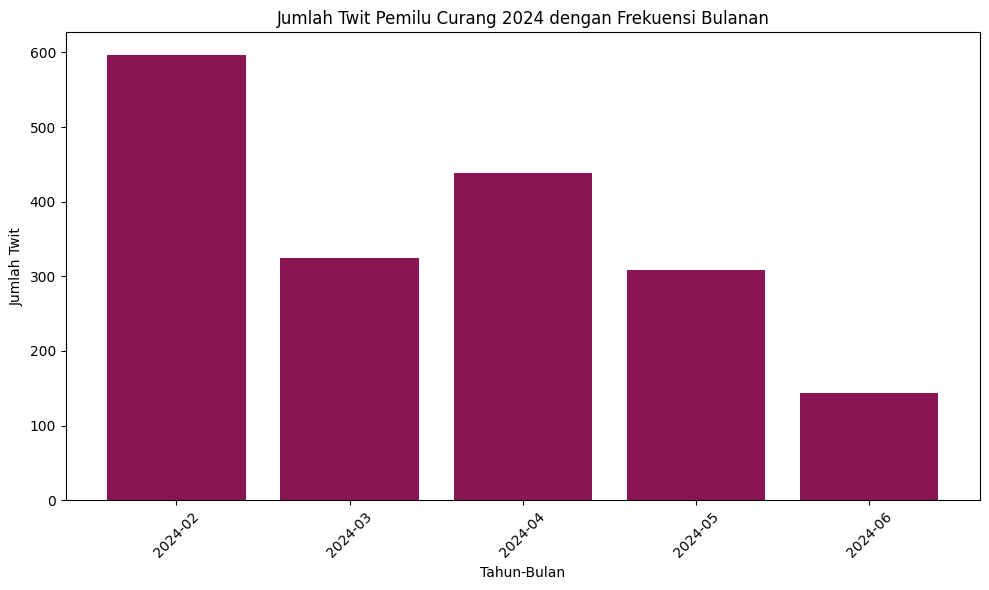

In [36]:
# Pastikan kolom 'created_at' adalah tipe datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])

# Mengelompokkan Twit berdasarkan bulan dan menghitung jumlahnya
monthly_text_count = dataset.groupby(dataset['created_at'].dt.to_period('M')).size()

# Konversi ke DataFrame untuk plotting
monthly_text_count = monthly_text_count.to_frame(name='count').reset_index()

# Plotting visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_text_count['created_at'].astype(str), monthly_text_count['count'], color='#891652', width=0.8)

# Konfigurasi plot
plt.title('Jumlah Twit Pemilu Curang 2024 dengan Frekuensi Bulanan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Twit')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca

# Menampilkan plot dengan jeda antar bar
plt.tight_layout()
plt.show()

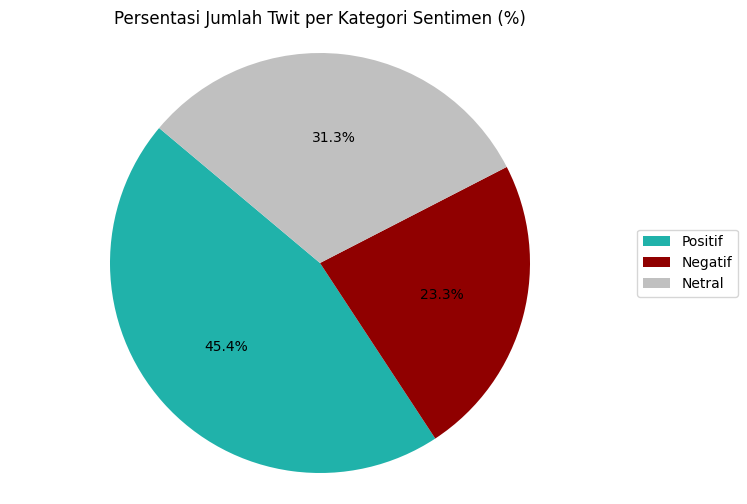

In [50]:
import matplotlib.pyplot as plt

# Menghitung jumlah Twit per kategori sentimen
klasifikasi_counts = dataset['klasifikasi'].value_counts()

# Menambahkan kategori netral dengan nilai awal 0 jika tidak ada dalam klasifikasi_counts
if 'Netral' not in klasifikasi_counts:
    klasifikasi_counts['Netral'] = 0
if 'Positif' not in klasifikasi_counts:
    klasifikasi_counts['Positif'] = 0
if 'Negatif' not in klasifikasi_counts:
    klasifikasi_counts['Negatif'] = 0

# Mengurutkan klasifikasi_counts sesuai dengan urutan label yang diinginkan
klasifikasi_counts = klasifikasi_counts[['Positif', 'Negatif', 'Netral']]

# Menentukan warna untuk setiap kategori
colors =  ['#20b2aa', '#900000', '#c0c0c0'] # Sesuaikan warna jika diperlukan

# Plotting grafik pie
plt.figure(figsize=(8, 6))
pie = plt.pie(klasifikasi_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentasi Jumlah Twit per Kategori Sentimen (%)')
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran sempurna

# Menambahkan legend dengan informasi warna
custom_labels = ['Positif', 'Negatif', 'Netral']  # Label baru untuk legend
plt.legend(pie[0], custom_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


C:\Users\test\AppData\Local\Temp\ipykernel_24476\2450948045.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


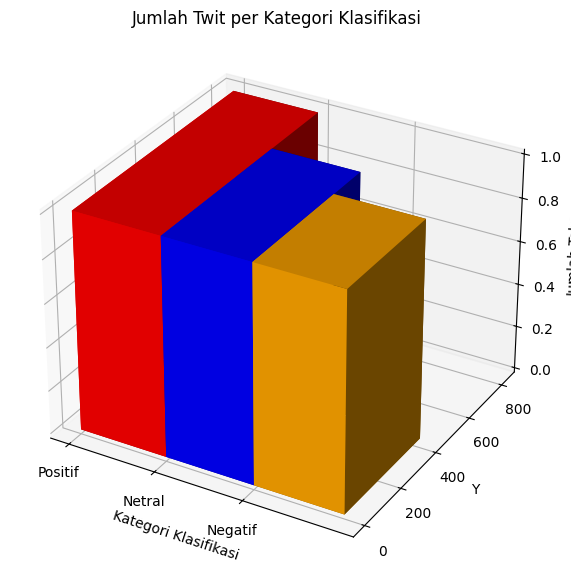

In [38]:
# Data
klasifikasi_counts = dataset['klasifikasi'].value_counts()

# Menambahkan kategori netral dengan nilai awal 0 jika tidak ada dalam klasifikasi_counts
if 'Netral' not in klasifikasi_counts:
    klasifikasi_counts['Netral'] = 0

# Plotting visualisasi dalam 3D
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Pengaturan bar
y = np.zeros(len(klasifikasi_counts))  # Perbaris saja
x = range(len(klasifikasi_counts))
z = np.zeros(len(klasifikasi_counts))
dy = klasifikasi_counts.values  # Lebar bar
dx = np.ones(len(klasifikasi_counts))  # Tinggi bar
dz = np.ones(len(klasifikasi_counts))  # Ketinggian bar (samping)
colors = ['red', 'blue', 'orange', 'green'] + ['gray'] * (len(klasifikasi_counts) - 4)  # Netral menjadi warna abu-abu

# Menggambar bar satu per satu
for i in range(len(klasifikasi_counts)):
    ax.bar3d(x[i], y[i], z[i], dx[i], dy[i], dz[i], color=colors[i])

# Konfigurasi plot
ax.set_title('Jumlah Twit per Kategori Klasifikasi ')
ax.set_xlabel('Kategori Klasifikasi')
ax.set_ylabel('Y')
ax.set_zlabel('Jumlah Teks')
ax.set_xticks(x)
ax.set_xticklabels(klasifikasi_counts.index)

# Menampilkan plot
plt.tight_layout()
plt.show()


#Wordcloud

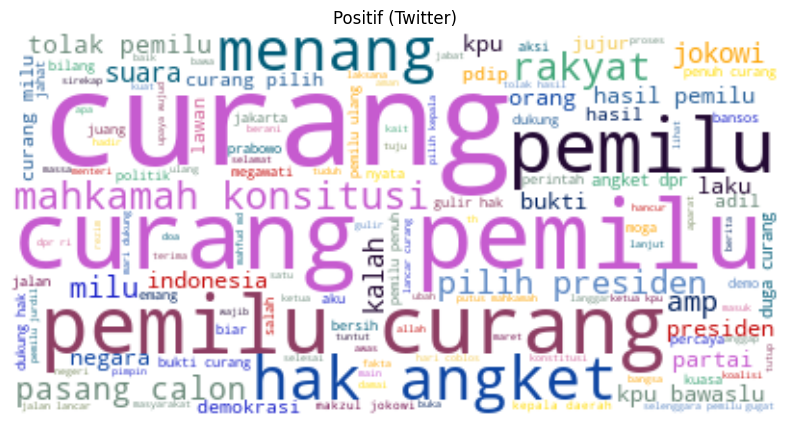

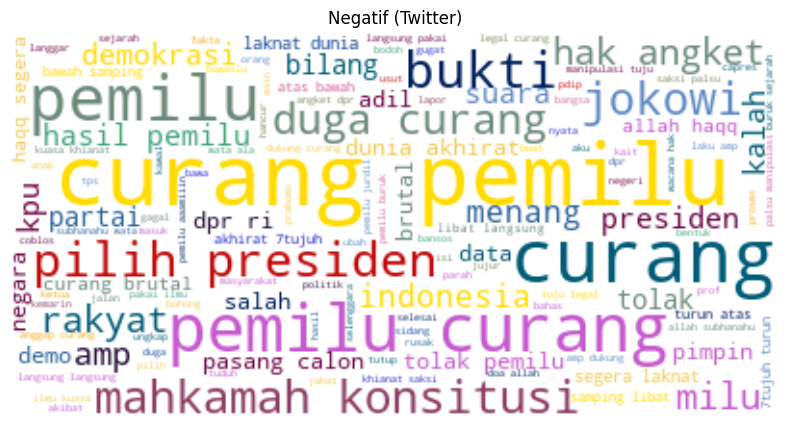

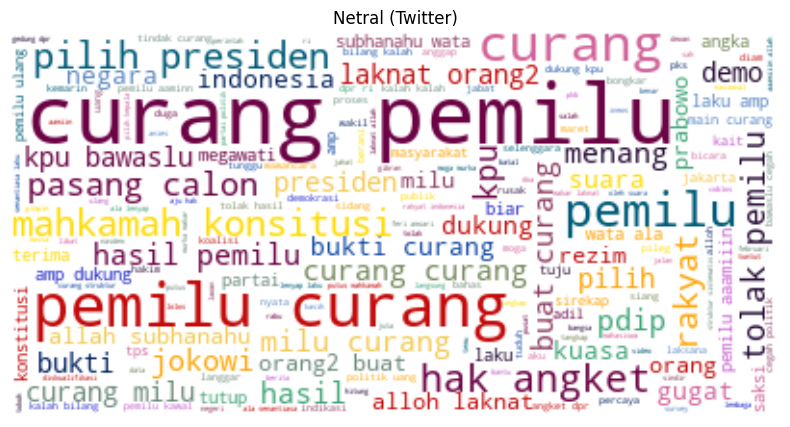

In [39]:

# Daftar warna yang akan digunakan
colors = ['#005C78', '#6B8A7A', '#6B8A7A', '#FFDB00', '#5C88C4', '#2A629A',
          '#8E3E63', '#D2649A', '#40A578', '#F3CA52', '#C40C0C', '#00215E',
          '#0E46A3', '#C65BCF','#6C0345','#76885B','#240A34','#FDA403','#1D24CA']

# Fungsi untuk memilih warna secara acak dari daftar warna
def random_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return random.choice(colors)

# Fungsi untuk membuat WordCloud
def create_wordcloud(text, sentiment_category):
    wordcloud = WordCloud(background_color='white', contour_width=1, contour_color='black', color_func=random_color_func).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"{sentiment_category.capitalize()} (Twitter)")
    plt.axis('off')
    plt.show()

# Mengambil data untuk setiap sentimen dan menambahkan kata "curang" pada sentimen positif
positive_text = ' '.join(dataset[dataset['klasifikasi'] == 'Positif']['stemming_string'].dropna().astype(str).values)
positive_text += ' ' + 'curang ' * 50  # Menambahkan kata "curang" sebanyak 50 kali

negative_text = ' '.join(dataset[dataset['klasifikasi'] == 'Negatif']['stemming_string'].dropna().astype(str).values)
neutral_text = ' '.join(dataset[dataset['klasifikasi'] == 'Netral']['stemming_string'].dropna().astype(str).values)

# Membuat WordCloud untuk setiap sentimen
create_wordcloud(positive_text, 'Positif')
create_wordcloud(negative_text, 'Negatif')
create_wordcloud(neutral_text, 'Netral')


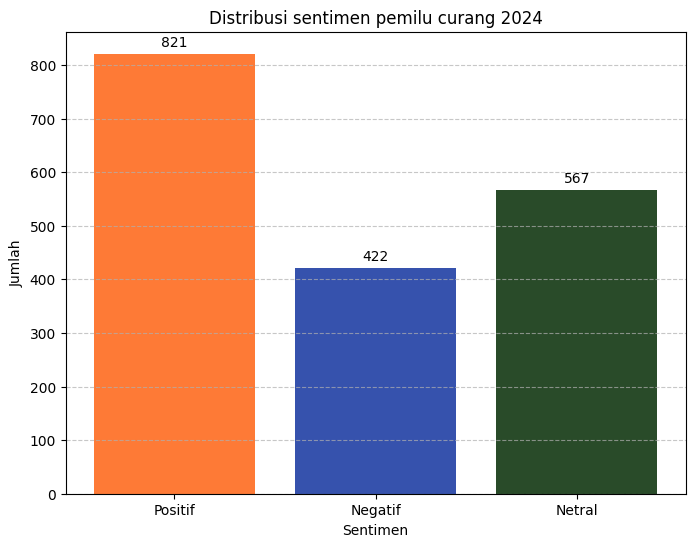

In [40]:
total_positif = sentiment_counts.get('Positif', 0)
total_negatif = sentiment_counts.get('Negatif', 0)
total_netral = sentiment_counts.get('Netral', 0)  # Hitung jumlah twit dengan sentimen netral

labels = ['Positif', 'Negatif', 'Netral']  # Tambahkan label 'Netral'
counts = [total_positif, total_negatif, total_netral]  # Tambahkan jumlah twit untuk kategori 'Netral'

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#FE7A36', '#3652AD', '#294B29'])  # Tambahkan warna untuk kategori 'Netral'

    # Menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi sentimen pemilu curang 2024")


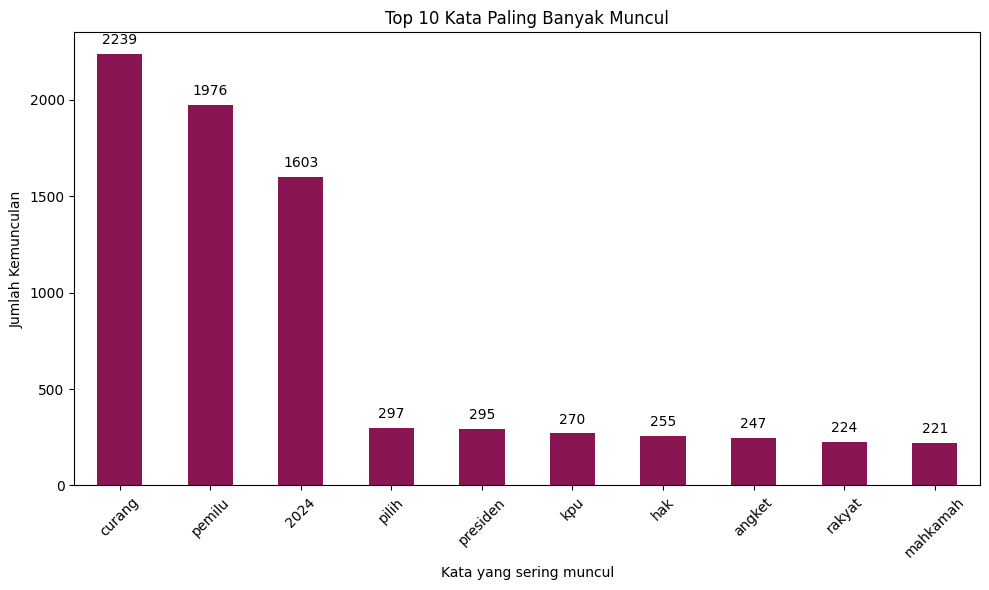

In [41]:
import matplotlib.pyplot as plt

# Menghitung frekuensi kemunculan setiap kata dalam kolom tertentu (misalnya 'full_text')
word_counts = dataset['stemming_string'].str.split(expand=True).stack().value_counts()

# Mengambil top 10 kata paling banyak muncul
top_10_words = word_counts.head(10)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
ax = top_10_words.plot(kind='bar', color='#891652')  # Ubah warna ke #891652

# Menambahkan angka di atas batang di posisi tengah-tengah
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Konfigurasi plot
plt.title('Top 10 Kata Paling Banyak Muncul')
plt.xlabel('Kata yang sering muncul')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca

# Menampilkan plot
plt.tight_layout()
plt.show()


#MEMANGGIL DATASET SETELAH TAHAP PREPROCESSING

In [3]:
# Membaca file CSV dan mengonversinya menjadi sebuah DataFrame
df = pd.read_csv('HASILkampus_indo(streming).csv')
df.head() #Menampilkan lima baris pertama dari DataFram

,created_at,full_text,full_text_english,Positif,Negatif,Netral,Compound,klasifikasi,norm,tokens,stopword,stemming,stemming_string
0,2024-02-19 13:51:18,saksikan inews prime dinilai curang pemilu dim...,watch inews prime is considered cheating the e...,0.0,0.00,1.00,0.00,Netral,saksikan inews prime dinilai curang pemilu dim...,"['saksikan', 'inews', 'prime', 'dinilai', 'cur...","['saksikan', 'inews', 'prime', 'dinilai', 'cur...","['saksi', 'inews', 'prime', 'nilai', 'curang',...",saksi inews prime nilai curang pemilu ulang se...
1,2024-02-19 13:57:59,lalu berdasarkan video ini bisa dibuat kesimpu...,then based on this video based on this videois...,0.0,0.00,1.00,0.00,Netral,lalu berdasarkan video ini bisa dibuat kesimpu...,"['lalu', 'berdasarkan', 'video', 'ini', 'bisa'...","['berdasarkan', 'video', 'kesimpulan', 'pemilu...","['dasar', 'video', 'simpul', 'milu', 'curang',...",dasar video simpul pemilu curang orang ambil s...
2,2024-02-19 14:03:03,profesor dr mahfud md menyebutkan pemilu 2024 ...,professor dr mahfud md said that the 2024 elec...,0.0,0.05,0.95,-0.05,Negatif,profesor dari mahfud md menyebutkan pemilu 202...,"['profesor', 'dari', 'mahfud', 'md', 'menyebut...","['profesor', 'mahfud', 'md', 'pemilu', '2024',...","['profesor', 'mahfud', 'md', 'milu', '2024', '...",profesor mahfud md pemilu 2024 peluang ulang m...
3,2024-02-19 14:08:27,profesor nih guys fakta harus diungkap kebenar...,professor guys facts must be revealed the trut...,0.0,0.00,1.00,0.00,Netral,profesor nih guys fakta harus diungkap kebenar...,"['profesor', 'nih', 'guys', 'fakta', 'harus', ...","['profesor', 'fakta', 'diungkap', 'kebenaran',...","['profesor', 'fakta', 'ungkap', 'benar', 'tega...",profesor fakta ungkap benar tegak profesor mah...
4,2024-02-19 14:09:55,joggetin aja aahhhh all in sini pada mampir ka...,just jogging aahhhh all in here to stop by you...,0.0,0.00,1.00,0.00,Netral,joggetin saja aahhhh all in sini pada mampir k...,"['joggetin', 'saja', 'aahhhh', 'all', 'in', 's...","['mampir', '2024']","['mampir', '2024']",mampir 2024


In [4]:
df.shape

(1810, 13)

#SPLIT DATASET


##DATA PREPPATION

In [5]:
# Ensure there are no NaN values and all entries are strings
df['stemming_string'] = df['stemming_string'].fillna('').astype(str)

In [6]:
x = df['stemming_string']
y = df['klasifikasi']

print(len(x), len(y))

1810 1810


In [7]:
#  90% dari data akan digunakan untuk pelatihan, dan sisanya 10% untuk pengujian.
from sklearn.model_selection import train_test_split
#Parameter random_state=149 digunakan untuk memastikan bahwa pemisahan data adalah konsisten di setiap eksekusi,
# membuat hasilnya dapat direproduksi.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9,random_state=149)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

1629 1629
181 181


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [9]:
# Gunakan yang terlatih untuk membuat matriks istilah dokumen dari set pelatihan dan pengujian
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

#TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf
print(x_train_tfidf)

  (0, 3343)	0.539414076398103
  (0, 3116)	0.3994968569708014
  (0, 2929)	0.2816198161946084
  (0, 2842)	0.2752670780054705
  (0, 2763)	0.10256372364576814
  (0, 1808)	0.4995658531199905
  (0, 887)	0.09474200752823968
  (0, 331)	0.3361667045105441
  (0, 89)	0.1108312687075627
  (1, 3796)	0.34622390569739664
  (1, 3040)	0.4279744974784751
  (1, 2763)	0.07356527120251387
  (1, 2228)	0.30451681367012795
  (1, 1046)	0.35199695933439323
  (1, 1009)	0.5110931431290172
  (1, 887)	0.06795503546807058
  (1, 492)	0.45029884558764205
  (1, 89)	0.07949528400850871
  (2, 3405)	0.8047669521423182
  (2, 2763)	0.1809729665182768
  (2, 2298)	0.5400486950899951
  (2, 887)	0.1671716036315136
  (3, 3358)	0.22136980787539115
  (3, 3084)	0.24460246690839577
  (3, 2929)	0.20408739091301215
  :	:
  (1628, 3484)	0.1060673826173231
  (1628, 2878)	0.22588033159259274
  (1628, 2703)	0.1598657762545464
  (1628, 2673)	0.15066840597626918
  (1628, 2349)	0.09099006034814207
  (1628, 2179)	0.21399089156823814
  (1628, 

#MODELLING


##Klasifikasi Naive Bayes

MENGGUNAKAN LIBERY COMPLEMEN NB

In [11]:
# Inisialisasi model dan pelatihan
CNB = ComplementNB()
CNB.fit(x_train_tfidf, y_train)

# Prediksi
predictedCNB = CNB.predict(x_test_dtm)
accuracyCNB = accuracy_score(predictedCNB, y_test)

# Print akurasi
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracyCNB*100)) + '%')
print('------------------------------------------------')



ComplementNB model accuracy is 66.85%
------------------------------------------------


MENGGUNAKAN LIBERY GAUSIAN NB

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model dan pelatihan
GNB = GaussianNB()
GNB.fit(x_train_tfidf.toarray(), y_train)

# Prediksi
predictedGNB = GNB.predict(x_test_dtm.toarray())
accuracyGNB = accuracy_score(predictedGNB, y_test)

# Print akurasi
print('GaussianNB model accuracy is', str('{:04.2f}'.format(accuracyGNB * 100)) + '%')
print('------------------------------------------------')


GaussianNB model accuracy is 59.67%
------------------------------------------------


MENGGUNAKAN LIBERY MULTINOMINAL NB

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
MNB = MultinomialNB()
MNB.fit(x_train_tfidf, y_train)  # Tidak perlu menggunakan .toarray() untuk MultinomialNB

# Prediksi
predicted = MNB.predict(x_test_dtm)
accuracy = accuracy_score(predicted, y_test)

# Print akurasi
print('MultinomialNB model accuracy is', str('{:04.2f}'.format(accuracy * 100)) + '%')
print('------------------------------------------------')


MultinomialNB model accuracy is 60.22%
------------------------------------------------


EVALUASI

#Confusion Matrik

CONFUSION MATRIK COMPLEMEN NB

Confusion Matrix:
    0   1   2
0  20   5  21
1   5  28  18
2   2   9  73
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.74      0.43      0.55        46
      Netral       0.67      0.55      0.60        51
     Positif       0.65      0.87      0.74        84

    accuracy                           0.67       181
   macro avg       0.69      0.62      0.63       181
weighted avg       0.68      0.67      0.65       181



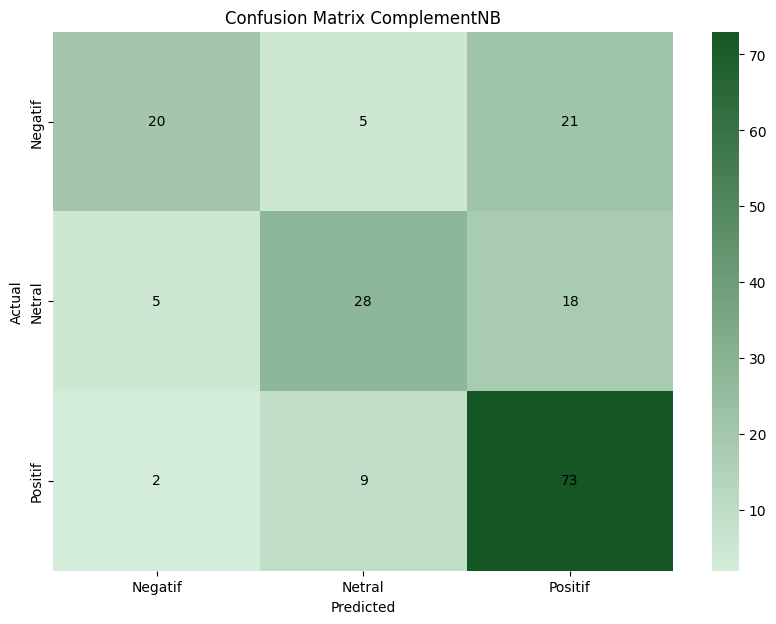

In [14]:
# Confusion Matrix
cmCNB = confusion_matrix(y_test, predictedCNB)
print('Confusion Matrix:')
print(pd.DataFrame(cmCNB))
print('------------------------------------------------')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, predictedCNB))

# Membuat colormap kustom dengan gradasi dari biru ke putih
colors = ['#d4edda', '#155724'] # Warna dari biru ke putih
cmap = mcolors.LinearSegmentedColormap.from_list('gradasi', colors)

# Plot confusion matrix dengan label yang disesuaikan
labels = ['Negatif', 'Netral', 'Positif']
plt.figure(figsize=(10,7))
sns.heatmap(cmCNB, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, annot_kws={"color": "black"})
plt.title('Confusion Matrix ComplementNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

CONFUSION MATRIK GAUSIAN NB

Confusion Matrix:
    0   1   2
0  29   9   8
1   9  33   9
2  13  25  46
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.57      0.63      0.60        46
      Netral       0.49      0.65      0.56        51
     Positif       0.73      0.55      0.63        84

    accuracy                           0.60       181
   macro avg       0.60      0.61      0.59       181
weighted avg       0.62      0.60      0.60       181



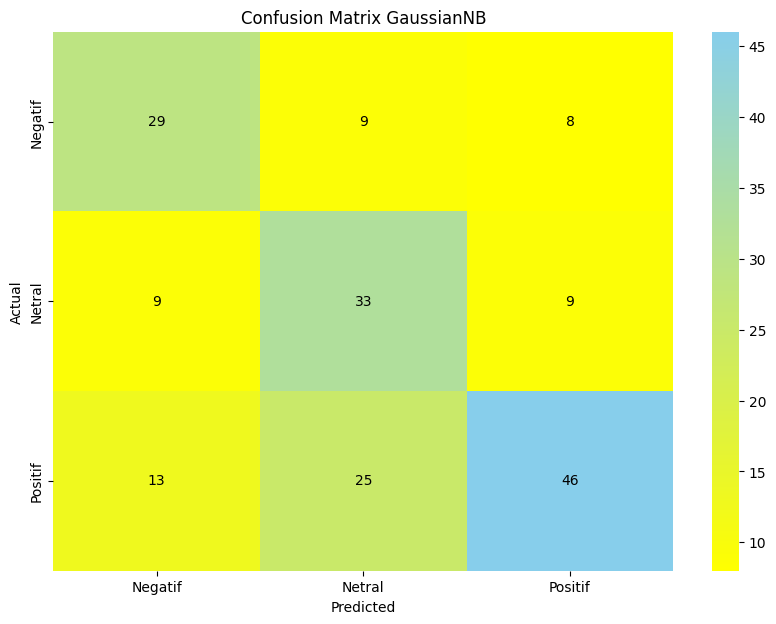

In [15]:

# Confusion Matrix
cmGNB = confusion_matrix(y_test, predictedGNB)
print('Confusion Matrix:')
print(pd.DataFrame(cmGNB))
print('------------------------------------------------')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, predictedGNB))

# Membuat colormap kustom dengan gradasi dari kuning ke biru muda sky
colors = ['#FFFF00', '#87CEEB']  # Warna dari kuning ke biru muda sky
cmap = mcolors.LinearSegmentedColormap.from_list('gradasi', colors)

# Plot confusion matrix dengan label yang disesuaikan
labels = ['Negatif', 'Netral', 'Positif']
plt.figure(figsize=(10,7))
sns.heatmap(cmGNB, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, annot_kws={"color": "black"})
plt.title('Confusion Matrix GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

CONFUSION MATRIK MULTINOMINAL NB

Confusion Matrix:
    0   1   2
0  10   3  33
1   1  20  30
2   1   4  79
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.83      0.22      0.34        46
      Netral       0.74      0.39      0.51        51
     Positif       0.56      0.94      0.70        84

    accuracy                           0.60       181
   macro avg       0.71      0.52      0.52       181
weighted avg       0.68      0.60      0.56       181



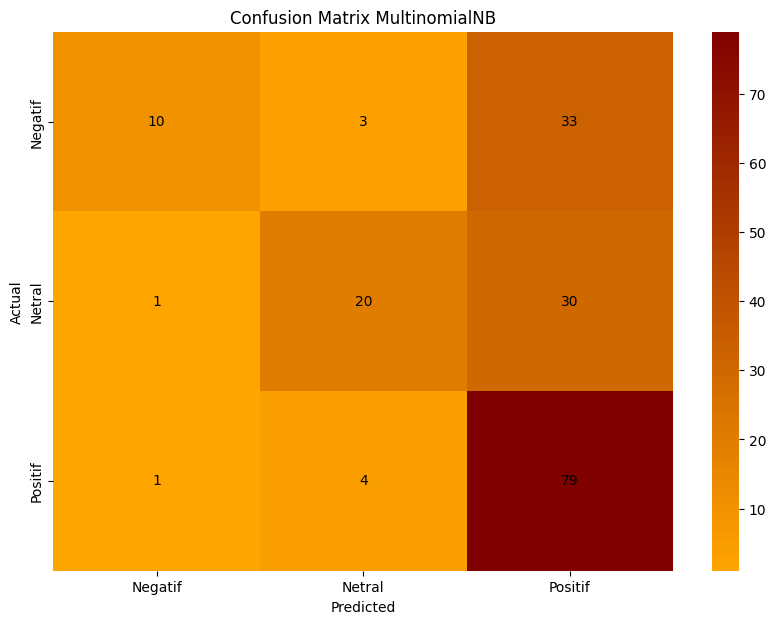

In [16]:
# Confusion Matrix
cmMNB = confusion_matrix(y_test, predicted)
print('Confusion Matrix:')
print(pd.DataFrame(cmMNB))
print('------------------------------------------------')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, predicted))

# Membuat colormap kustom dengan gradasi dari oren ke marron
colors = ['#FFA500', '#800000']  # Warna dari oren ke marron
cmap = mcolors.LinearSegmentedColormap.from_list('gradasi', colors)

# Plot confusion matrix dengan label yang disesuaikan
labels = ['Negatif', 'Netral', 'Positif']
plt.figure(figsize=(10,7))
sns.heatmap(cmMNB, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, annot_kws={"color": "black"})
plt.title('Confusion Matrix MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()